**IMPORTING THE LIBRARIES**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**LOADING THE DATA**

In [3]:
data= pd.read_csv('/content/diabetes_prediction_dataset.csv')
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


**EXPLORATORY DATA ANALYSIS**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [6]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [7]:
data['diabetes'].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

In [8]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [9]:
data.duplicated().sum()

3854

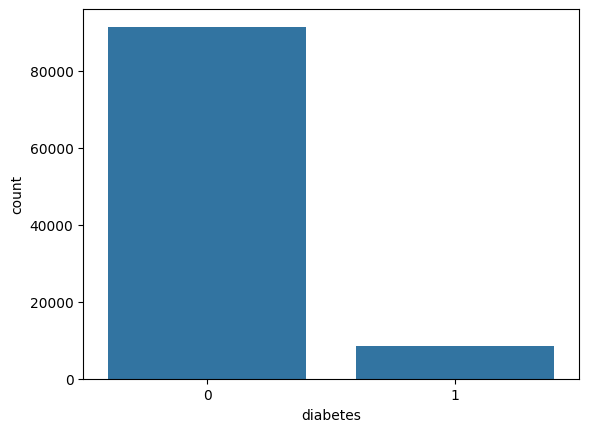

In [10]:
sns.countplot(x=data['diabetes'],data=data)
plt.show()

**OUR DATA IS HIGHLY IMBALANCED**

<ipython-input-11-b8947f1dc649>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


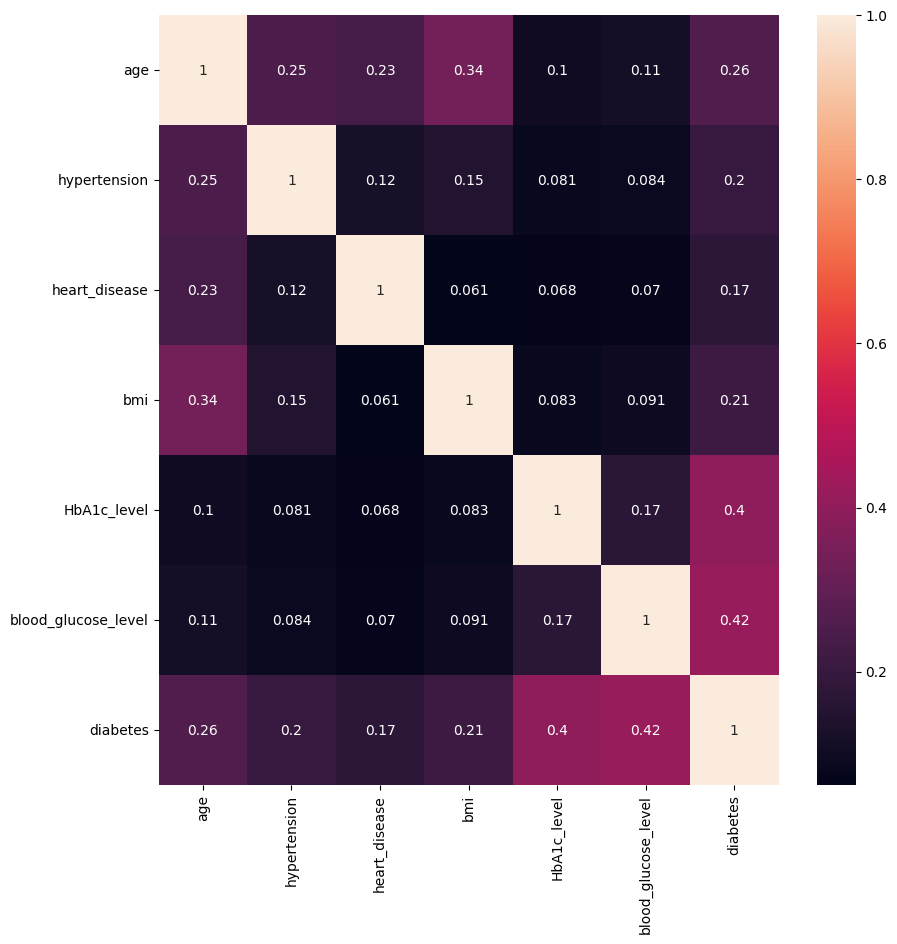

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [12]:
data['gender'] = np.where(data['gender'].str.lower() == 'female', 0, 1)

In [13]:
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,No Info,27.32,6.2,90,0
99996,0,2.0,0,0,No Info,17.37,6.5,100,0
99997,1,66.0,0,0,former,27.83,5.7,155,0
99998,0,24.0,0,0,never,35.42,4.0,100,0


In [14]:
data['smoking_history'].value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

In [15]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=[['never', 'No Info', 'not current', 'former', 'current', 'ever']])

In [16]:
smoking_history = data['smoking_history'].values.reshape(-1, 1)
ordinal_encoder = OrdinalEncoder(categories=[['never', 'No Info', 'not current', 'former', 'current', 'ever']])
smoking_history = ordinal_encoder.fit_transform(smoking_history)
data['smoking_history'] = smoking_history

In [17]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0.0,25.19,6.6,140,0
1,0,54.0,0,0,1.0,27.32,6.6,80,0
2,1,28.0,0,0,0.0,27.32,5.7,158,0
3,0,36.0,0,0,4.0,23.45,5.0,155,0
4,1,76.0,1,1,4.0,20.14,4.8,155,0


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

num_col = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
                     'blood_glucose_level', 'diabetes', 'gender', 'smoking_history']
data[num_col] = scaler.fit_transform(data[num_col])

In [19]:
data.fillna('0')

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.0,1.000000,0.0,1.0,0.0,0.177171,0.563636,0.272727,0.0
1,0.0,0.674675,0.0,0.0,0.2,0.202031,0.563636,0.000000,0.0
2,1.0,0.349349,0.0,0.0,0.0,0.202031,0.400000,0.354545,0.0
3,0.0,0.449449,0.0,0.0,0.8,0.156863,0.272727,0.340909,0.0
4,1.0,0.949950,1.0,1.0,0.8,0.118231,0.236364,0.340909,0.0
...,...,...,...,...,...,...,...,...,...
99995,0.0,1.000000,0.0,0.0,0.2,0.202031,0.490909,0.045455,0.0
99996,0.0,0.024024,0.0,0.0,0.2,0.085901,0.545455,0.090909,0.0
99997,1.0,0.824825,0.0,0.0,0.6,0.207983,0.400000,0.340909,0.0
99998,0.0,0.299299,0.0,0.0,0.0,0.296569,0.090909,0.090909,0.0


In [20]:
x = data.drop(['diabetes'], axis = 1)
y = data['diabetes']

In [21]:
x.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
dtype: int64

**BALANCING THE DATA**

In [22]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_oversample, y_oversample = smote.fit_resample(x, y)

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_oversample,y_oversample,test_size=0.25,random_state=20)


In [24]:
x_train.shape

(137250, 8)

In [25]:
y_train.shape

(137250,)

**MODEL BUILDING**

**LOGISTIC REGRESSION**

In [26]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [27]:
y_pred = log.predict(x_test)

In [28]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [29]:
log_accuracy = accuracy_score(y_test, y_pred)
log_cm = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [30]:
print(classification_rep)
print(log_accuracy)

              precision    recall  f1-score   support

         0.0       0.88      0.89      0.89     22855
         1.0       0.89      0.88      0.89     22895

    accuracy                           0.89     45750
   macro avg       0.89      0.89      0.89     45750
weighted avg       0.89      0.89      0.89     45750

0.8861857923497268


**DECISION TREE CLASSIFIER**

In [31]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(random_state=10)
dc.fit(x_train,y_train)

DecisionTreeClassifier(random_state=10)

In [32]:
y_pred_dc=dc.predict(x_test)

In [33]:
dc_accuracy = accuracy_score(y_test, y_pred_dc)
dc_cm = confusion_matrix(y_test, y_pred_dc)
classification_rep = classification_report(y_test, y_pred_dc)

In [34]:
print(dc_cm)

[[21972   883]
 [  833 22062]]


In [35]:
print(classification_rep)
print(dc_accuracy)

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96     22855
         1.0       0.96      0.96      0.96     22895

    accuracy                           0.96     45750
   macro avg       0.96      0.96      0.96     45750
weighted avg       0.96      0.96      0.96     45750

0.9624918032786886


**RANDOM FOREST CLASSIFIER**

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=70,max_depth=15)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=15, n_estimators=70)

In [37]:
y_pred_rf=rf.predict(x_test)

In [38]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_cm = confusion_matrix(y_test, y_pred_rf)
classification_rep = classification_report(y_test, y_pred_rf)

In [39]:
print(rf_cm)

[[21416  1439]
 [ 1034 21861]]


In [40]:
print(classification_rep)
print(rf_accuracy)

              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95     22855
         1.0       0.94      0.95      0.95     22895

    accuracy                           0.95     45750
   macro avg       0.95      0.95      0.95     45750
weighted avg       0.95      0.95      0.95     45750

0.9459453551912568


**K NEAREST NEIGHBORS ALGORITHM**

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [43]:
y_pred_knn=knn.predict(x_test)

In [44]:
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_cm = confusion_matrix(y_test, y_pred_knn)
classification_rep = classification_report(y_test, y_pred_knn)

In [45]:
print(knn_cm)

[[20890  1965]
 [  371 22524]]


In [46]:
print(classification_rep)
print(knn_accuracy)

              precision    recall  f1-score   support

         0.0       0.98      0.91      0.95     22855
         1.0       0.92      0.98      0.95     22895

    accuracy                           0.95     45750
   macro avg       0.95      0.95      0.95     45750
weighted avg       0.95      0.95      0.95     45750

0.9489398907103825


**SUPPORT VECTOR MACHINES**

In [47]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)

SVC()

In [48]:
y_pred_svc=svc.predict(x_test)

In [ ]:
svc_accuracy = accuracy_score(y_test, y_pred_svc)
svc_cm = confusion_matrix(y_test, y_pred_svc)
classification_rep = classification_report(y_test, y_pred_svc)

In [50]:
print(svc_cm)

[[20202  2653]
 [ 1986 20909]]


In [51]:
print(classification_rep)
print(svc_accuracy)

              precision    recall  f1-score   support

         0.0       0.91      0.88      0.90     22855
         1.0       0.89      0.91      0.90     22895

    accuracy                           0.90     45750
   macro avg       0.90      0.90      0.90     45750
weighted avg       0.90      0.90      0.90     45750

0.8986010928961748


**XGBOOST ALGORITHM**

In [52]:
import xgboost as xgb
xgb = xgb.XGBClassifier()

In [53]:
xgb.fit(x_train,y_train)
y_pred_xgb=xgb.predict(x_test)

In [54]:
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_cm = confusion_matrix(y_test, y_pred_xgb)
classification_rep = classification_report(y_test, y_pred_xgb)

In [55]:
print(xgb_cm)

[[22677   178]
 [  953 21942]]


In [56]:
print(classification_rep)
print(xgb_accuracy)

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98     22855
         1.0       0.99      0.96      0.97     22895

    accuracy                           0.98     45750
   macro avg       0.98      0.98      0.98     45750
weighted avg       0.98      0.98      0.98     45750

0.9752786885245902


**ARTIFICIAL NEURAL NETWORK**

In [57]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [58]:
model=Sequential()
model.add(Dense(units=8,activation='relu'))
model.add(Dense(units=7,activation='relu'))
model.add(Dense(units=6,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [59]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [60]:
model.fit(x_train,y_train,epochs=80)

Epoch 1/80
4290/4290 [==============================] - 15s 3ms/step - loss: 0.2901 - accuracy: 0.8655
Epoch 2/80
4290/4290 [==============================] - 13s 3ms/step - loss: 0.2468 - accuracy: 0.8841
Epoch 3/80
4290/4290 [==============================] - 13s 3ms/step - loss: 0.2457 - accuracy: 0.8849
Epoch 4/80
4290/4290 [==============================] - 12s 3ms/step - loss: 0.2449 - accuracy: 0.8848
Epoch 5/80
4290/4290 [==============================] - 13s 3ms/step - loss: 0.2415 - accuracy: 0.8858
Epoch 6/80
4290/4290 [==============================] - 12s 3ms/step - loss: 0.2387 - accuracy: 0.8855
Epoch 7/80
4290/4290 [==============================] - 13s 3ms/step - loss: 0.2369 - accuracy: 0.8870
Epoch 8/80
4290/4290 [==============================] - 13s 3ms/step - loss: 0.2343 - accuracy: 0.8889
Epoch 9/80
4290/4290 [==============================] - 12s 3ms/step - loss: 0.2312 - accuracy: 0.8906
Epoch 10/80
4290/4290 [==============================] - 12s 3ms/step - l

In [69]:
y_pred_ann = model.predict(x_test)
y_pred_ann = (y_pred_ann > 0.5)

1430/1430 [==============================] - 6s 4ms/step


In [68]:
ann_accuracy = accuracy_score(y_test, y_pred_ann)
ann_cm = confusion_matrix(y_test, y_pred_ann)
classification_rep = classification_report(y_test, y_pred_ann)

In [70]:
print(classification_rep)
print(ann_accuracy)

              precision    recall  f1-score   support

         0.0       0.93      0.89      0.91     22855
         1.0       0.90      0.93      0.91     22895

    accuracy                           0.91     45750
   macro avg       0.91      0.91      0.91     45750
weighted avg       0.91      0.91      0.91     45750

0.9103825136612022


**PERFORMANCE OF ALL THE MODELS**

In [66]:
Algorithms = [ 'Random Forest', 'XGB', 'Decision Trees', 'Logistic Regression','SVM','ANN']
accuracy = [ rf_accuracy, xgb_accuracy, dc_accuracy, log_accuracy,svc_accuracy,ann_accuracy]

ACCURACY=pd.DataFrame({'Algorithm':Algorithms, 'Accuracy':accuracy})

ACCURACY

,Algorithm,Accuracy
0,Random Forest,0.945945
1,XGB,0.975279
2,Decision Trees,0.962492
3,Logistic Regression,0.886186
4,SVM,0.898601
5,ANN,0.910383


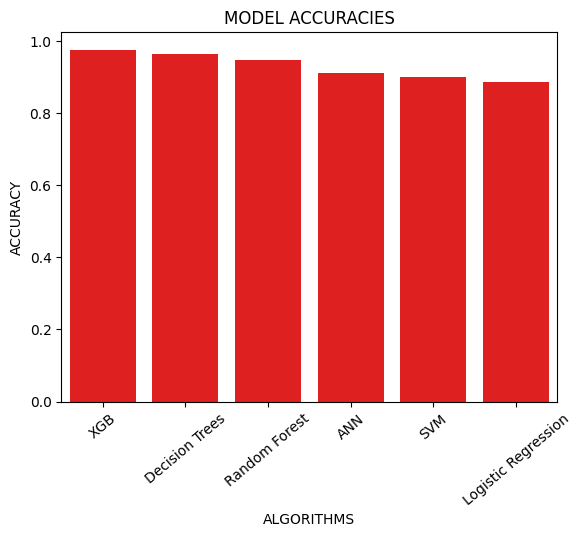

In [71]:
ACCURACY=pd.DataFrame({'Algorithm':Algorithms, 'Accuracy':accuracy}).sort_values(by=['Accuracy'], ascending=False)
sns.barplot(x='Algorithm',y='Accuracy',data=ACCURACY,color='r')
plt.xticks(rotation=40)
plt.xlabel("ALGORITHMS")
plt.ylabel("ACCURACY")
plt.title("MODEL ACCURACIES")
plt.show()

**XGBOOST HAS THE MOST ACCURACY AMONG ALL THE MODELS**